<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/4_03_Multinomial_Logistic_Regression/MLR_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Regression From Scratch

In [ ]:
%pip install \
  numpy==2.0.2 \
  scikit-learn==1.6.1 \
  matplotlib==3.10.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

## Algorithm

Reference: http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

### Softmax Function

$\quad \begin{array}{rcl}
\sigma(z)_l & = & \displaystyle\frac{e^{z_l}}{e^{z_1} + e^{z_2} + ... + e^{z_k}} \\
 & = & \displaystyle\frac{e^{z_l}}{\sum_{l=1}^{k}e^{z_l}} \\
\end{array}$

where $z = \theta_0 + \theta_1 x_1 + ... + \theta_m x_m = X \cdot \theta$,

and $l \in [ 1, k ]$

The output of softmax function is a vector of size k, the same number of
the classes, they are the probability of each input value.

And the output is
normalized, meaning the sum of all elements is 1, and each element is
between 0 and 1.

### Hypothesis Function

$\quad h_\theta(X)=\frac{1}{\sum_{l=1}^{k}e^{-X\theta^{(l)}}}\begin{bmatrix}
e^{-X\theta^{(1)}} \\
e^{-X\theta^{(2)}} \\
... \\
e^{-X\theta^{(k)}}
\end{bmatrix}$

Where θ is a matrix of $m \times k$, its columns are classes and denoted by $θ^{(k)}$,
its rows are features which is same as the binary logistic regression.
Therefore it can be denoted as,

$\quad \theta = \begin{bmatrix}
| & | & | & | \\
\theta^{(1)} & \theta^{(2)} & ... & \theta^{(k)} \\
| & | & | & |
\end{bmatrix}$

$θ$ has $m$ rows which corresponding to the features. Compare with the $θ$
for binary logistic regression, it has $m$ rows but only one column.

### Cost Function

The cross-entropy function for multinomial logistic regression is:

$ \quad J(\theta) = - \frac{1}{n}\sum_{i=1}^{n}\sum_{l=1}^{k}1\left\{ y^{(i)}=k \right\}log(h_\theta(x^{(i)}))
$

where $
1 \left\{  \right\} = \left\{ \begin{array}{cl}
1 & \left\{ \text{statement is true} \right\} \\
0 & \left\{ \text{statement is false}\right\}
\end{array} \right.
$

### Gradient

The gradient descent method will be used to find the minimum value of
the cost function. The gradient is a vector, each element is the partial
derivative of a feature/variable. The size of gradient is same as that of $θ$.

$\quad \nabla J(\theta) = \begin{bmatrix}
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_0} \\
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_1}  \\
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_2} \\
... \\
\displaystyle\frac{\partial J( \theta ) }{\partial \theta_m} \\ \end{bmatrix} =
\begin{bmatrix}
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( y^{(i)} - h_\theta(x^{(i)})  ) \\
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( y^{(i)} - h_\theta(x^{(i)})  ) x_1^{(i)}  \\
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( y^{(i)} - h_\theta(x^{(i)})  ) x_2^{(i)} \\
... \\
\displaystyle\frac{\mathrm{1} }{n}  \sum_{i=1}^{n} ( y^{(i)} - h_\theta(x^{(i)}) ) x_m^{(i)} \\ \end{bmatrix}$

## Multinomial Logistic Regression Class

In [3]:
class MultinomialLogisticRegression:
    def __init__(self, X, y, fit_intercept=True):
        self.X = X
        self.y = self.one_hot(y.reshape(-1,1))
        if fit_intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        self.theta = np.zeros((self.X.shape[1], self.y.shape[1]))
        self.fit_intercept = fit_intercept
        self.cost_history = []
        self.epoch_history = []

    def one_hot(self, y):
        n_classes = len(np.unique(y))
        oh = np.zeros((len(y), n_classes))
        for i, val in enumerate(y):
            oh[i, val] = 1.0
        return oh

    def softmax(self, z):
        z_max = np.amax(z, axis=1, keepdims=True)
        exp_shifted = np.exp(z - z_max)
        return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)

    def hypothesis(self, X):
        z = np.dot(X, self.theta)
        return (self.softmax(-z))

    def cost(self, h, y):
        return (-np.mean(np.sum(np.log(h) * (y), axis=1)))

    def gradient(self, X, h, y):
        return np.dot(np.transpose(X), (y - h)) / y.shape[0]

    def fit(self, epochs=5000, alpha=0.01):
        for i in range(epochs):
            h = self.hypothesis(self.X)
            cost = self.cost(h, self.y)
            grad = self.gradient(self.X, h, self.y)
            self.theta -= alpha * grad
            self.epoch_history.append(i)
            self.cost_history.append(cost)

    def predict(self, X):
        if self.fit_intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        h = self.hypothesis(X)
        return np.argmax(h, axis=1)


## Load hand-written digits dataset

1.   Load the dataset
2.   Scale the data
3.   Split into train and test sets



In [4]:
digits = datasets.load_digits()
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(digits.data)
y = digits.target
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y,
                                 train_size = .75,
                                 random_state=0)



4.   Create a MultinomialLogisticRegression class
5.   Fit it with train set
6.   Make prediction with test set
7.   Print out the results



In [5]:
regressor = MultinomialLogisticRegression(X_train, y_train)
regressor.fit(epochs=10000, alpha=0.01)
y_pred = regressor.predict(X_test)
a_score = metrics.accuracy_score(y_test, y_pred)
c_matrix = metrics.confusion_matrix(y_test, y_pred)
c_report = metrics.classification_report(y_test, y_pred)
print("Accuracy Score:", a_score)
print("Confusion matrix:\n", c_matrix)
print("Classification Report:\n", c_report)

Accuracy Score: 0.9622222222222222
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  1  0  1  0  0  1]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 36  0  0  2  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  1  0 45]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       0.92      0.95      0.94        38
           5       0.96      0.98      0.97        48
           6       0.98      0.98      0.98        52
           7       0.94      0.96      0.95        48
           8       0.98      0.90      0.93        48
           9       0.96      0.96      0.96       



8.   Visualize the confusion matrix




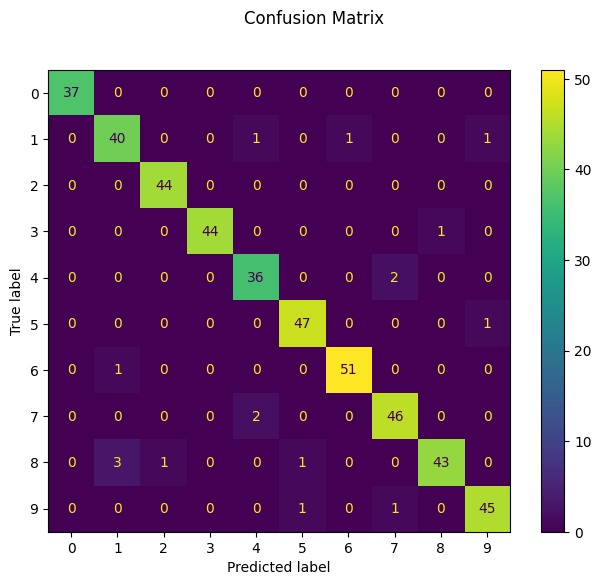

In [6]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['image.cmap'] = 'Blues'
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

9.   Display the cost vs epoch

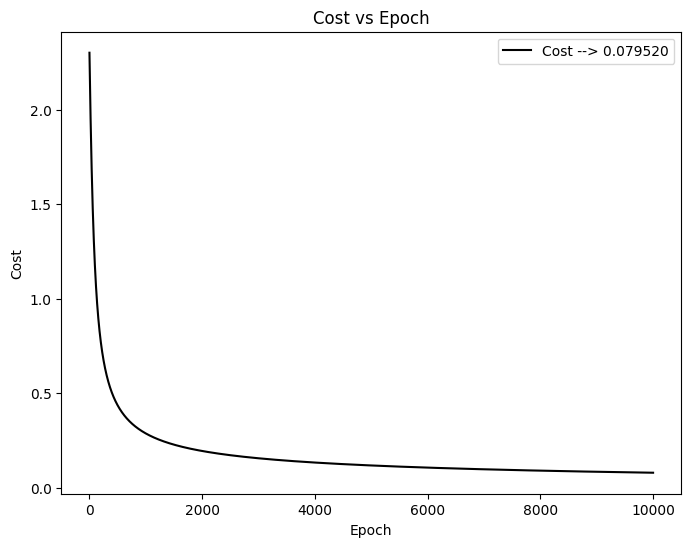

In [7]:
fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')
plt.plot(regressor.epoch_history, regressor.cost_history, color='k', label="Cost --> %f"%regressor.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("multinomial_regression_from_scratch.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

## Other Datasets

Iris Dataset

*   number of sample data: $n=150$
*   features: $m=4$
*   classes: $k=3$




X1 size: (150, 4)
y1 size (150,)
y1 classes: [0 1 2]

Accuracy Score: 0.9733333333333334

Confusion Matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



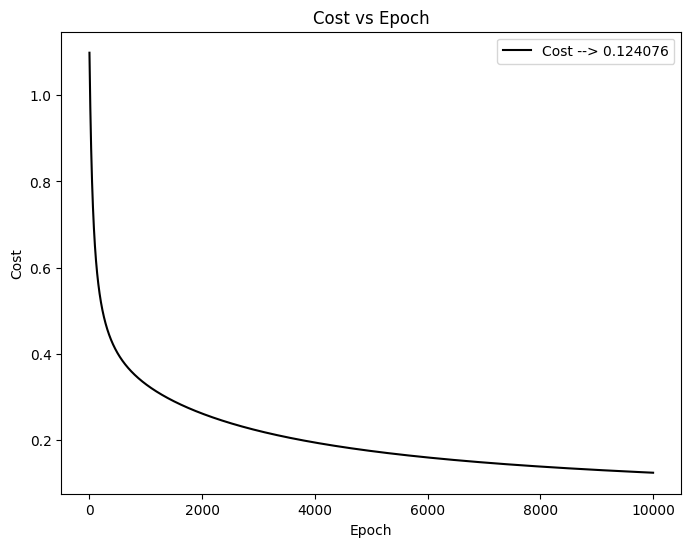

In [8]:
iris = datasets.load_iris()
scaler = preprocessing.StandardScaler()
X1 = scaler.fit_transform(iris.data)
y1 = iris.target
print("X1 size:", X1.shape)
print("y1 size", y1.shape)
print("y1 classes:", np.unique(y1))

regressor1 = MultinomialLogisticRegression(X1, y1)
regressor1.fit(epochs=10000, alpha=0.01)
y1_pred = regressor1.predict(X1)
a_score = metrics.accuracy_score(y1, y1_pred)
c_matrix = metrics.confusion_matrix(y1, y1_pred)
c_report = metrics.classification_report(y1, y1_pred)
print("\nAccuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)
print("\nClassification Report:\n", c_report)

fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')
plt.plot(regressor1.epoch_history, regressor1.cost_history, color='k', label="Cost --> %f"%regressor1.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("multinomial_regression_from_scratch1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Generated sample dataset

*   number of sample data: $n=1000$
*   features: $m=12$
*   classes: $k=6$

X2 size: (1000, 12)
y2 size (1000,)
y2 classes: [0 1 2 3 4 5]

Accuracy Score: 0.779

Confusion Matrix:
 [[124   0   6  25   0   6]
 [ 10 122   2  33   0   0]
 [  0   3 148   1  15   0]
 [  5  28   1 113   1  21]
 [ 18   2   3   1 142   0]
 [ 12   0   4   1  23 130]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       161
           1       0.79      0.73      0.76       167
           2       0.90      0.89      0.89       167
           3       0.65      0.67      0.66       169
           4       0.78      0.86      0.82       166
           5       0.83      0.76      0.80       170

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000



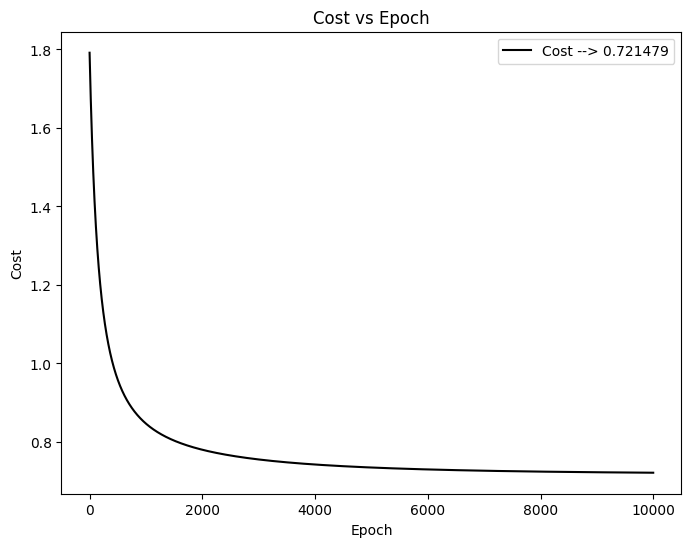

In [9]:
X2, y2 = datasets.make_classification(
                  n_samples=1000,
                  n_features=12,
                  n_informative=3,
                  n_classes=6,
                  n_clusters_per_class=1,
                  random_state=1)

print("X2 size:", X2.shape)
print("y2 size", y2.shape)
print("y2 classes:", np.unique(y2))

regressor2 = MultinomialLogisticRegression(X2, y2)
regressor2.fit(epochs=10000, alpha=0.01)
y2_pred = regressor2.predict(X2)
a_score = metrics.accuracy_score(y2, y2_pred)
c_matrix = metrics.confusion_matrix(y2, y2_pred)
c_report = metrics.classification_report(y2, y2_pred)
print("\nAccuracy Score:", a_score)
print("\nConfusion Matrix:\n", c_matrix)
print("\nClassification Report:\n", c_report)

fig = plt.figure(figsize=(8,6))
plt.title(r'Cost vs Epoch')
plt.plot(regressor2.epoch_history, regressor2.cost_history, color='k', label="Cost --> %f"%regressor2.cost_history[-1])
plt.xlabel('Epoch')
plt.ylabel("Cost")
plt.legend(loc='best')
plt.savefig("multinomial_regression_from_scratch2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()